In [ ]:
from google.colab import files

In [ ]:
data = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/split_NN.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: split_NN/train/9_mop/15991_mop.jpg  
  inflating: split_NN/train/9_mop/15992_mop.jpg  
  inflating: split_NN/train/9_mop/15995_mop.jpg  
  inflating: split_NN/train/9_mop/15999_mop.jpg  
  inflating: split_NN/train/9_mop/16000_mop.jpg  
  inflating: split_NN/train/9_mop/16001_mop.jpg  
  inflating: split_NN/train/9_mop/16002_mop.jpg  
  inflating: split_NN/train/9_mop/16004_mop.jpg  
  inflating: split_NN/train/9_mop/16005_mop.jpg  
  inflating: split_NN/train/9_mop/16007_mop.jpg  
  inflating: split_NN/train/9_mop/16009_mop.jpg  
  inflating: split_NN/train/9_mop/16010_mop.jpg  
  inflating: split_NN/train/9_mop/16012_mop.jpg  
  inflating: split_NN/train/9_mop/16014_mop.jpg  
  inflating: split_NN/train/9_mop/16016_mop.jpg  
  inflating: split_NN/train/9_mop/16017_mop.jpg  
  inflating: split_NN/train/9_mop/16018_mop.jpg  
  inflating: split_NN/train/9_mop/16021_mop.jpg  
  inflating: split_NN/train/9_mo

In [ ]:
import keras
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from keras import callbacks

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array, array_to_img
import keras.utils as image

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Каталог с данными для обучения
train_dir = "/content/split_NN/train"
# Каталог с данными для проверки
val_dir = "/content/split_NN/val"
# Каталог с данными для тестирования
test_dir = "/content/split_NN/test"
# Размеры изображения
img_height, img_width = 224, 314 #571, 800, 280, 400
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_height, img_width, 3)
# Количество эпох
epochs = 10
# Размер мини-выборки
batch_size = 128 #1024

# Количество изображений для обучения
nb_train_samples = 37592
# Количество изображений для проверки
nb_validation_samples = 7721
# Количество изображений для тестирования
nb_test_samples = 7144

In [ ]:
classes = [
           'без_отделки',
           'предчистовая',
           #'экономный',
           'стандартный',
           #'улучшенный',
           'план',
           'улица',
           'балкон',
           'моп',
           'мусор'
          ]

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = input_shape, activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
#model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 314, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 314, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 157, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 157, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 157, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 157, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 78, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 78, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 78, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 78, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 39, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 39, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 39, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 39, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 19, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 19, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 9, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,911,144 (7.29 MB)

 Trainable params: 1,911,144 (7.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy', #у нас более 2 классов
              optimizer = 'adam',
              metrics = ['accuracy']
             )

In [ ]:
datagen = ImageDataGenerator(rescale = 1. / 255)

In [ ]:
train_generator = datagen.flow_from_directory(
                                              train_dir,
                                              target_size = (img_height, img_width),
                                              batch_size = batch_size,
                                              class_mode = 'categorical'
                                             )

Found 23778 images belonging to 8 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
                                            val_dir,
                                            target_size = (img_height, img_width),
                                            batch_size = batch_size,
                                            class_mode = 'categorical'
                                           )

Found 4067 images belonging to 8 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
                                             test_dir,
                                             target_size = (img_height, img_width),
                                             batch_size = batch_size,
                                             class_mode = 'categorical'
                                            )

Found 7149 images belonging to 8 classes.


In [ ]:
model_checkpoint = callbacks.ModelCheckpoint(filepath = 'model_best_{epoch}.h5',
                                             monitor = 'val_loss',
                                             verbose = 1,
                                             save_best_only = True,
                                             save_weights_only = False,
                                             mode = 'auto',
                                             save_freq = 'epoch'
                                             )

In [ ]:
early_stop = callbacks.EarlyStopping(monitor = 'val_loss',
                                     min_delta = 0,
                                     patience = 2,
                                     verbose = 1,
                                     mode = 'auto',
                                    # baseline = 0.006,
                                     restore_best_weights = True
                                     )

In [ ]:
hist = model.fit(
                 train_generator,
                 #steps_per_epoch = nb_train_samples // batch_size,
                 epochs = epochs,
                 validation_data = val_generator,
                 #validation_steps = nb_validation_samples // batch_size
                 callbacks = [model_checkpoint, early_stop]
                )

Epoch 1/6
47/47 [==============================] - ETA: 0s - loss: 1.9924 - accuracy: 0.2110 
Epoch 1: val_loss improved from inf to 2.07777, saving model to model_best_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 1212s 26s/step - loss: 1.9924 - accuracy: 0.2110 - val_loss: 2.0778 - val_accuracy: 0.1271
Epoch 2/6
47/47 [==============================] - ETA: 0s - loss: 1.7032 - accuracy: 0.3460 
Epoch 2: val_loss improved from 2.07777 to 1.74991, saving model to model_best_2.h5
47/47 [==============================] - 1206s 26s/step - loss: 1.7032 - accuracy: 0.3460 - val_loss: 1.7499 - val_accuracy: 0.3177
Epoch 3/6
47/47 [==============================] - ETA: 0s - loss: 1.4817 - accuracy: 0.4367 
Epoch 3: val_loss improved from 1.74991 to 1.67693, saving model to model_best_3.h5
47/47 [==============================] - 1205s 26s/step - loss: 1.4817 - accuracy: 0.4367 - val_loss: 1.6769 - val_accuracy: 0.3865
Epoch 4/6
47/47 [==============================] - ETA: 0s - loss: 1.2956 - accuracy: 0.5264 
Epoch 4: val_loss improved from 1.67693 to 1.62445, saving model to model_best_4.h5
47/47 [==============================] - 1208s 26s/step - loss: 1.2956

In [ ]:
model.save('My_model_8.h5')

In [ ]:
scores = model.evaluate(test_generator)
print("Accuracy на тестовых данных: %.2f%%" % (scores[1]*100))

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

tab_res = pd.DataFrame({'accuracy': acc, 'val_accuracy': val_acc, 'loss': loss, 'val_loss': val_loss})
tab_res

In [ ]:
# Считаем графики Accuracy
plt.figure(figsize = (10, 7))

plt.plot(hist.history['accuracy'],
         label='Accuracy')
plt.plot(hist.history['val_accuracy'],
         label='Val_Accuracy')
plt.xlabel('Эпоха обучения')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Считаем графики потери
plt.figure(figsize = (10, 7))

plt.plot(hist.history['loss'],
         label='loss')
plt.plot(hist.history['val_loss'],
         label='Val_loss')
plt.xlabel('Эпоха обучения')
plt.ylabel('loss')
plt.legend()
plt.show()

# ResNet152V2

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import callbacks

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Каталог с данными для обучения
train_dir = "/content/split_NN/train"
# Каталог с данными для проверки
val_dir = "/content/split_NN/val"
# Каталог с данными для тестирования
test_dir = "/content/split_NN/test"

# Размеры изображения
img_height, img_width = 224, 224
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_height, img_width, 3)
# Количество эпох
epochs = 10
# Размер мини-выборки
batch_size = 1024

# Количество изображений для обучения
nb_train_samples = 23778
# Количество изображений для проверки
nb_validation_samples = 7721
# Количество изображений для тестирования
nb_test_samples = 7144

# Определение количества классов
num_classes = 8

In [ ]:
# Загрузка предобученной модели ResNet152V2
base_model = ResNet152V2(
                         weights = 'imagenet',
                         include_top = False,
                         input_shape = input_shape
                        )

# Замораживание слоев в базовой модели
for layer in base_model.layers:
    layer.trainable = False

# Создание модели для transfer learning
x = Flatten()(base_model.output)
x = Dense(512, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)

#x = Dropout(0.5)(x)

predictions = Dense(num_classes, activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)

234545216/234545216 [==============================] - 1s 0us/step


In [ ]:
# Компиляция модели
model.compile(loss = 'categorical_crossentropy', #у нас 10 классов
              optimizer = 'adam',
              metrics = ['accuracy']
             )

In [ ]:
datagen = ImageDataGenerator(
                             #preprocessing_function = preprocess_input,
                             rescale = 1. / 255
                             )

In [ ]:
train_generator = datagen.flow_from_directory(
                                              train_dir,
                                              target_size = (img_height, img_width),
                                              batch_size = batch_size,
                                              class_mode = 'categorical'
                                             )

Found 37592 images belonging to 8 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
                                            val_dir,
                                            target_size = (img_height, img_width),
                                            batch_size = batch_size,
                                            class_mode = 'categorical'
                                           )

Found 4067 images belonging to 8 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
                                             test_dir,
                                             target_size = (img_height, img_width),
                                             batch_size = batch_size,
                                             class_mode = 'categorical'
                                            )

Found 7149 images belonging to 8 classes.


In [ ]:
model_checkpoint = callbacks.ModelCheckpoint(filepath = 'model_best_{epoch}.h5',
                                             monitor = 'val_loss',
                                             verbose = 1,
                                             save_best_only = True,
                                             save_weights_only = False,
                                             mode = 'auto',
                                             save_freq = 'epoch'
                                             )

In [ ]:
early_stop = callbacks.EarlyStopping(monitor = 'val_loss',
                                     min_delta = 0,
                                     patience = 2,
                                     verbose = 1,
                                     mode = 'auto',
                                    # baseline = 0.006,
                                     restore_best_weights = True
                                     )

In [ ]:
hist = model.fit(
                 train_generator,
                 #steps_per_epoch = nb_train_samples // batch_size,
                 epochs = epochs,
                 validation_data = val_generator,
                 #validation_steps = nb_validation_samples // batch_size
                 callbacks = [model_checkpoint, early_stop]
                )

Epoch 1/10
37/37 [==============================] - 1386s 37s/step - loss: 2.8947 - accuracy: 0.6512 - val_loss: 0.6684 - val_accuracy: 0.7833
Epoch 2/10
37/37 [==============================] - 1390s 37s/step - loss: 0.4016 - accuracy: 0.8655 - val_loss: 0.5158 - val_accuracy: 0.8279
Epoch 3/10
37/37 [==============================] - 1396s 38s/step - loss: 0.2184 - accuracy: 0.9334 - val_loss: 0.4633 - val_accuracy: 0.8454
Epoch 4/10
37/37 [==============================] - 1395s 38s/step - loss: 0.1230 - accuracy: 0.9704 - val_loss: 0.4625 - val_accuracy: 0.8478
Epoch 5/10
37/37 [==============================] - 1403s 38s/step - loss: 0.0715 - accuracy: 0.9874 - val_loss: 0.4868 - val_accuracy: 0.8468
Epoch 6/10
37/37 [==============================] - 1409s 38s/step - loss: 0.0399 - accuracy: 0.9959 - val_loss: 0.4941 - val_accuracy: 0.8525
Epoch 7/10
37/37 [==============================] - 1415s 38s/step - loss: 0.0244 - accuracy: 0.9981 - val_loss: 0.5073 - val_accuracy: 0.8535

In [ ]:
model.save('ResNet152V2_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 223s 31s/step - loss: 0.5390 - accuracy: 0.8657


In [ ]:
print("Accuracy на тестовых данных: %.2f%%" % (scores[1]*100))

Accuracy на тестовых данных: 86.57%


In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

NameError: name 'hist' is not defined

In [ ]:
import pandas as pd

tab_res = pd.DataFrame({'accuracy': acc, 'val_accuracy': val_acc, 'loss': loss, 'val_loss': val_loss})

NameError: name 'acc' is not defined

In [ ]:
import matplotlib.pyplot as plt

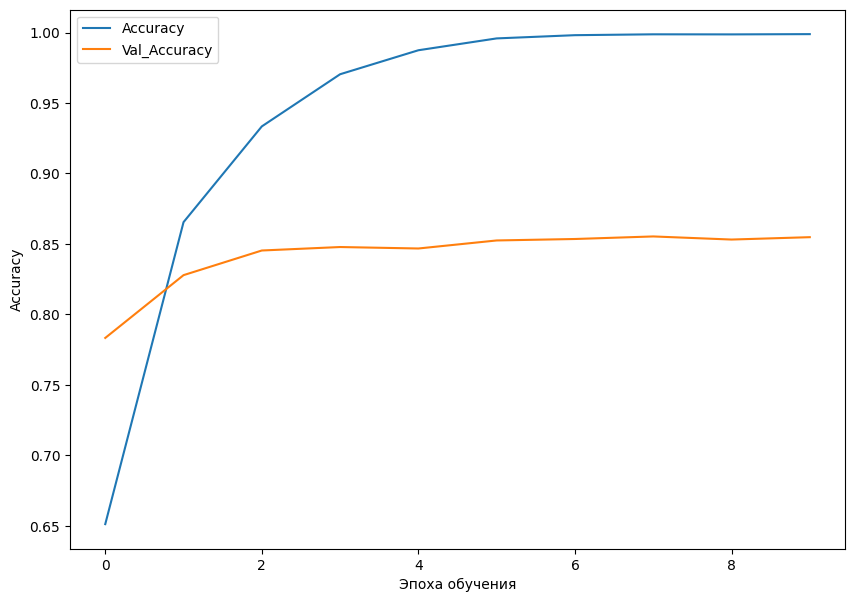

In [ ]:
# Считаем графики Accuracy
plt.figure(figsize = (10, 7))

plt.plot(hist.history['accuracy'],
         label='Accuracy')
plt.plot(hist.history['val_accuracy'],
         label='Val_Accuracy')
plt.xlabel('Эпоха обучения')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

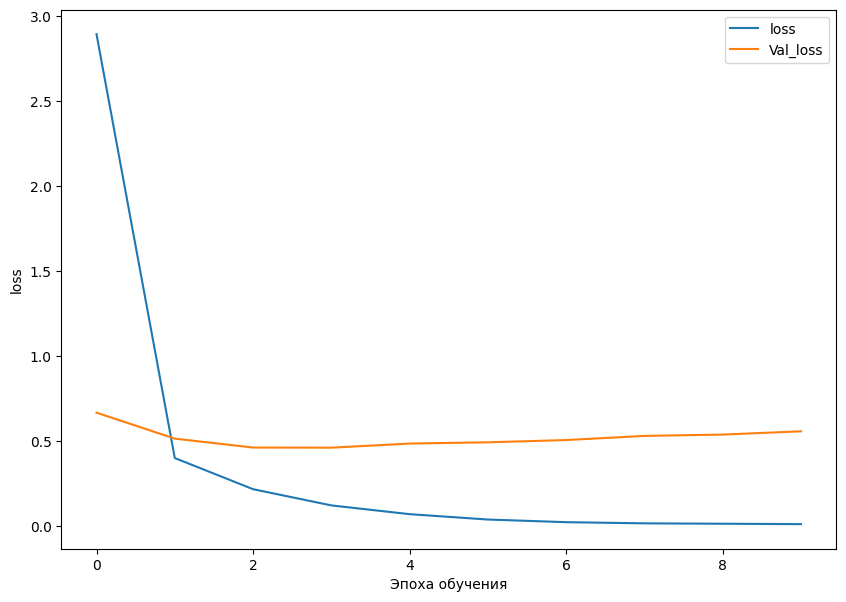

In [ ]:
# Считаем графики потери
plt.figure(figsize = (10, 7))

plt.plot(hist.history['loss'],
         label='loss')
plt.plot(hist.history['val_loss'],
         label='Val_loss')
plt.xlabel('Эпоха обучения')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/ResNet152V2_model.h5')

In [ ]:
from sklearn.metrics import confusion_matrix

# Предсказание на тестовых данных
predictions = model.predict(val_generator,
                            steps = val_generator.samples // val_generator.batch_size)

# Получение истинных меток
y_true = []

for batch in val_generator:
    y_true.extend(np.argmax(batch[1], axis = 1))

y_true = np.array(y_true)

# Получение предсказанных меток
y_pred = np.argmax(predictions, axis = 1)

# Построение матрицы ошибок
cm = confusion_matrix(y_true, y_pred)

# Вывод матрицы ошибок
print(cm)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1870s 627s/step


KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

classes = [
           'без_отделки',
           'предчистовая',
           #'экономный',
           'стандартный',
           #'улучшенный',
           'план',
           'улица',
           'балкон',
           'моп',
           'мусор'
          ]

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

fig, ax = plt.subplots(figsize = (10, 10))
disp.plot(values_format = '.3g', ax = ax)
plt.xticks(rotation = 70)
plt.show();

In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report : ")
print(classification_report(y_true, y_pred))